# Entrega 1 - HR Analytics: Job Change of Data Scientists


### Integrantes:

* Chiabotto Lorenzo
* Bertone Matias
* Storani Gianfranco

### Dataset
[HR Analytics: Job Change of Data Scientists](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv)



#### Dataset sample

In [207]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./dataset/aug_train.csv')

#train.sample(10)

# 1. Listado de variables

* **enrollee_id** : ID unico para cada candidato. *(No se utiliza debido a que es simplemente un identificador de la persona)*

* **city**: Codigo de la ciudad. *(Variable de entrada)*

* **city_development_index** : Indice de desarrollo de la ciudad. *(Variable de entrada)*

* **gender**: Genero. *(Variable de entrada)*

* **relevent_experience**: Si el candiato tiene experiencia relevante en el area de la nueva empresa. *(Variable de entrada)*

* **enrolled_university**: Tipo de curso universitario matriculado. *(Variable de entrada)*
 
* **education_level**: Nivel de educacion del candidato. *(Variable de entrada)*

* **major_discipline** :Disciplina principal del candidato. *(Variable de entrada)*

* **experience**: Experiencia total del candidato en años. *(Variable de entrada)*

* **company_size**: Cantidad de empleados actuales en la compania. *(Variable de entrada)*

* **company_type** : Tipo de compania. *(Variable de entrada)*

* **lastnewjob**: Diferencia en años entre su trabajo previo y el acutal. *(Variable de entrada)*

* **training_hours**: Horas de entrenamiento completadas. *(Variable de entrada)*

* **target**: 0 – No esta buscando un cambio de laburo, 1 – Esta buscando un cambio de laburo. *(Variable de salida)*

### Variables de entrada - Transformaciones

* **city**: No se realizan modificaciones. Los valores esperados son códigos de ciudad con el formato ciity_xxx.
* **city_development_index**: No se realizan modificaciones. Los valores esperados son números decimales entre 0 y 1.
* **gender**: Utilizamos One hot encodeer ya que tiene 3 valores posibles: "male", "female" y "other".  A los valores nulos no se les asignará ningún valor.
* **relevent_experience**: Lo modificaremos a valores booleanos, donde 1 es que tiene experiencia relevante y 0 no tiene.
* **enrolled_university**: Se reemplazan los datos por:
 * *nulos* = -1
 * *no_enrollment* = 0
 * *Part time course* = 0,5
 * *Full time course* = 1
* **education_level**: Se reemplazan los datos por:
 * *nulos* = -1
 * *Primary School*=1
 * *High School*= 2
 * *Graduate*= 3
 * *Masters*= 4
 * *Phd* = 5
* **major_discipline**: Los valores posibles en el dataset son: "STEM", "Others" y "No Major". Lo que haremos será incluir los valores "Humanities", "Business Degree" y "Arts" en "Other", ya que representan un % muy bajo de los datos y al utilizar One hot encodeer nos sumarían columnas con poca información a la tabla.  A los valores nulos no se les asignará ningún valor.
* **experience**: Se reemplazan el valor <1 por 0 y >20 por 21. Los valores posibles de entrada son números naturales del 0 al 21. Los valores nulos se reemplazan por 10, ya que la mediana es 10,10.
* **company_type**: Utilizaremos One hot encodeer ya que tiene 5 valores posibles. Estos son: "Pvt Ltd", "Funded Startup", "Public Sector", "Early Stage", "Startup", "NGO" y "Other". A los valores nulos no se les asignará ningún valor.
* **company_size**: Se reemplazan los valores por el nùmero máximo posible de empleados:
 *   *<10* = 10
 *   *10/49* = 50
 *   *50-99* = 100
 *   *100-499* = 500
 *   *500-999* = 1000
 *   *1000-4999* = 5000
 *   *5000-9999* = 10000
 *   *10000+* = 20000 
 *   *Los valores nulos se reemplazan por 5000 ya que la mediana es 4179,18*
* **last_new_job**: Los valores posibles de entrada son números naturales entre 0 y 5. Se reemplazan los valores de la siguiente forma:
 *  *never* = -1
 *  *>4* = 5
 *  *Los valores nulos se reemplazan por 2, ya que la mediana es 2,30*
* **training_hours**: No se realizan modificaciones. Los valores posibles de entrada son números naturales. Los valores nulos se reemplazaran por 47 a que es la mediana.

# 2.  Análisis detallado

## Balanceo

<AxesSubplot:ylabel='target'>

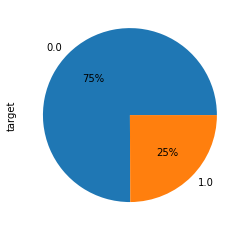

In [137]:
train.target.value_counts().plot.pie(autopct='%1.0f%%', figsize=(4,4))

Como se puede ver en el gráfico el dataset se encuentra altamente desbalanceado, ya que tiene una proporcion de 3 a 1 siendo el mayor de estos el valor 0 (La persona no esta buscando un cambio de trabajo).
Esto repercutira al momento de separar el dataset en test y train, ya que al tener un modelo tan desbalanceado podria darse el caso en el cual ambos dataset resultantes obtengan una distribucion muy diferente al original y por ende entre ellos mismos.


## Relacion variables de entrada / salida

### City_index

<AxesSubplot:title={'center':'% buscando trabajo por indice de desarrollo'}>

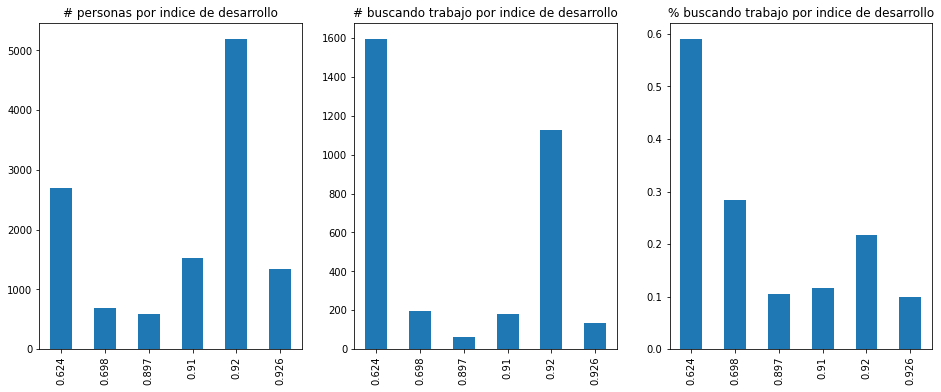

In [277]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# personas por indice de desarrollo')
train.city_development_index.value_counts()[train.city_development_index.value_counts() > 500].sort_index().plot.bar(ax=ax[0])


ax[1].set_title('# buscando trabajo por indice de desarrollo')
train[train.target == True].city_development_index.value_counts()[train.city_development_index.value_counts() > 500].sort_index().plot.bar(ax=ax[1])


ax[2].set_title('% buscando trabajo por indice de desarrollo')
(train[train.target == True].city_development_index.value_counts()[train.city_development_index.value_counts() > 500].sort_index() / train.city_development_index.value_counts()[train.city_development_index.value_counts() > 500].sort_index()).plot.bar(ax=ax[2])


Podemos ver como en aquellas ciudades con un indice de desarrollo muy bajo mas de la mitad de las personas se encuentran abiertos a un cambio de trabajo. Esto es lo mas razonable, ya que ante ese bajo nivel de desarrollo las personas buscan seguir evolucionando laboralmente con el fin de poder llevar una vida mejor.

In [273]:
cities = train[["city", "city_development_index"]].drop_duplicates(subset=None, keep='first', inplace=False)
cities[cities.city.isin(train.city.value_counts()[train.city.value_counts() > 500].index)]

,city,city_development_index
0,city_103,0.920
2,city_21,0.624
6,city_160,0.920
15,city_114,0.926
34,city_16,0.910
106,city_136,0.897


### Company_type

<AxesSubplot:title={'center':'% Personas buscando trabajo por tipo de empresa'}>

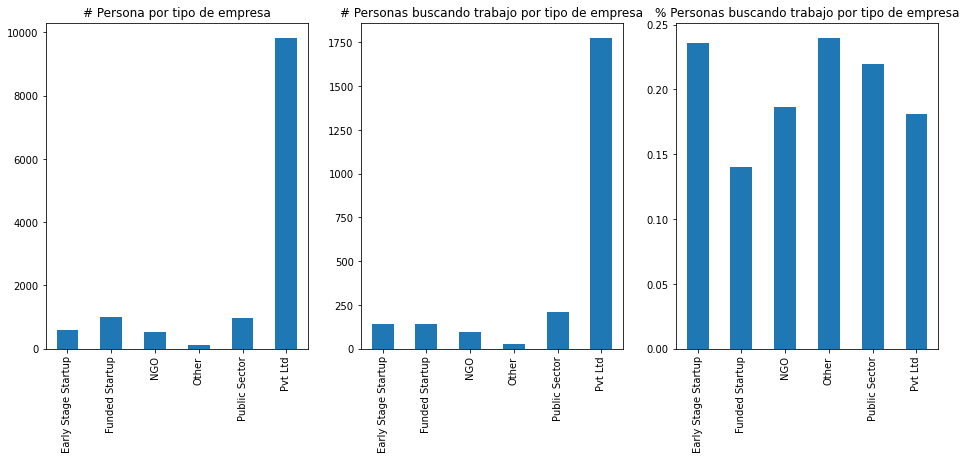

In [52]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# Persona por tipo de empresa')
train.company_type.value_counts().sort_index().plot.bar(ax=ax[0])

ax[1].set_title('# Personas buscando trabajo por tipo de empresa')
train[train.target == True].company_type.value_counts().sort_index().plot.bar(ax=ax[1])

ax[2].set_title('% Personas buscando trabajo por tipo de empresa')
(train[train.target == True].company_type.value_counts().sort_index() / train.company_type.value_counts().sort_index()).plot.bar(ax=ax[2])

La relación que podemos ver entre los tipos de empresa y el hecho de que se encuentre en búsqueda de un nuevo empleo, es que en todas las entidades se da que existe menos del 25% de personas que estén buscando cambiar de empleo. Se nota una diferencia en Funded Startup, en la cual expresa una realidad ya que en aquellas empresa mas estables las personas no están interesadas en cambiar de empleo. Por otro lado, en aquellas empresas mas jóvenes "Early Stage Startup" el gráfico muestra en las personas un pequeño incremento en interés de cambiar de empleo y creemos que puede darse al no estar seguros del futuro de la empresa, esta diferencia también se muestra en el sector  Publico la cual nos llama la atención ya que en nuestro país trabajar este sector se lo reconoce como un trabajo estable.

### Relevant_experience

<AxesSubplot:title={'center':'% Personas buscando trabajo por experiencia'}>

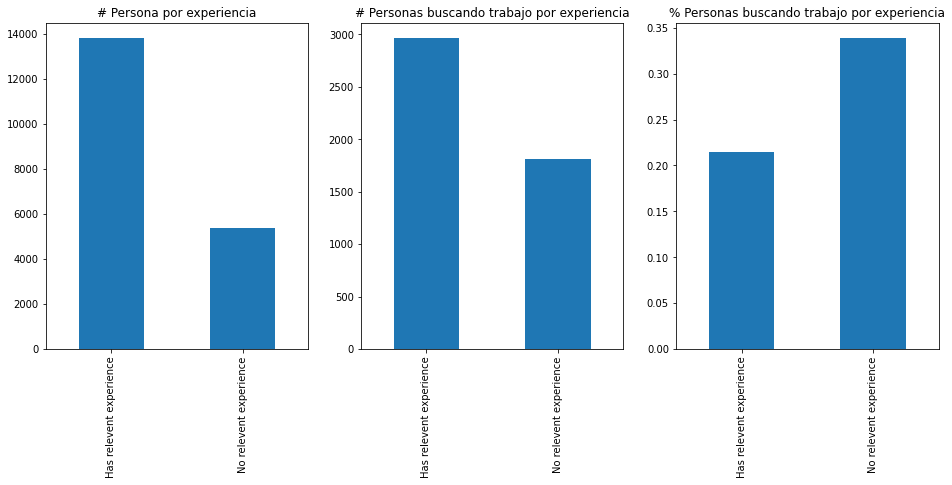

In [54]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# Persona por experiencia')
train.relevent_experience.value_counts().sort_index().plot.bar(ax=ax[0])

ax[1].set_title('# Personas buscando trabajo por experiencia')
train[train.target == True].relevent_experience.value_counts().sort_index().plot.bar(ax=ax[1])

ax[2].set_title('% Personas buscando trabajo por experiencia')
(train[train.target == True].relevent_experience.value_counts().sort_index() / train.relevent_experience.value_counts().sort_index()).plot.bar(ax=ax[2])

Podemos observar que las personas que no posee experiencia relevante en area estan mas dispuestas a los cambios de trabajo. Esto es lo normal, ya que las mayoria de las personas suelen aceptar el cambio de laburo cuando este es su primer experiencia en el area de interes de estos, este dataset al estar basado en personas que realizaron cursos sobre el area es esperable que aquellos sin experiencia esten mas dispuestos a aceptar una oferta mas alla de las condiciones.

### Experience

<AxesSubplot:title={'center':'% Personas buscando trabajo por experiencia'}>

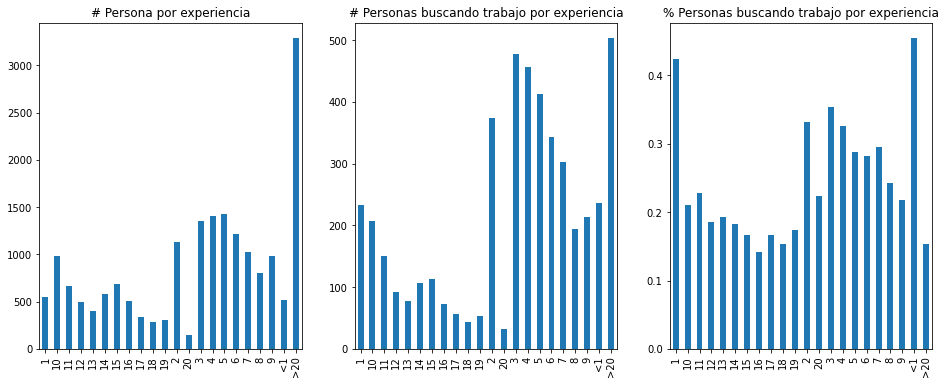

In [56]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# Persona por experiencia')
train.experience.value_counts().sort_index().plot.bar(ax=ax[0])

ax[1].set_title('# Personas buscando trabajo por experiencia')
train[train.target == True].experience.value_counts().sort_index().plot.bar(ax=ax[1])

ax[2].set_title('% Personas buscando trabajo por experiencia')
(train[train.target == True].experience.value_counts().sort_index() / train.experience.value_counts().sort_index()).plot.bar(ax=ax[2])

La relacion que podemos ver entre la experiencia laboral de las personas y el hecho de que se encuentre en busqueda de un nuevo empleo es que cuanto menor sea la experiencia de la persona es mas propensa al cambio.
Al ser un dataset relativamente nuevo (ultima actualizacion hace 4 meses) los datos coinciden con la actualidad del mundo laboral, donde las personas con menos experiencia son mas propensas a los cambios de trabajo. 
En las graficas se puede ver como el porcentaje es mayor en los grupos de personas con menos de 3 años de experiencia.

### Last new job

<AxesSubplot:title={'center':'% buscando trabajo según última expericencia labora'}>

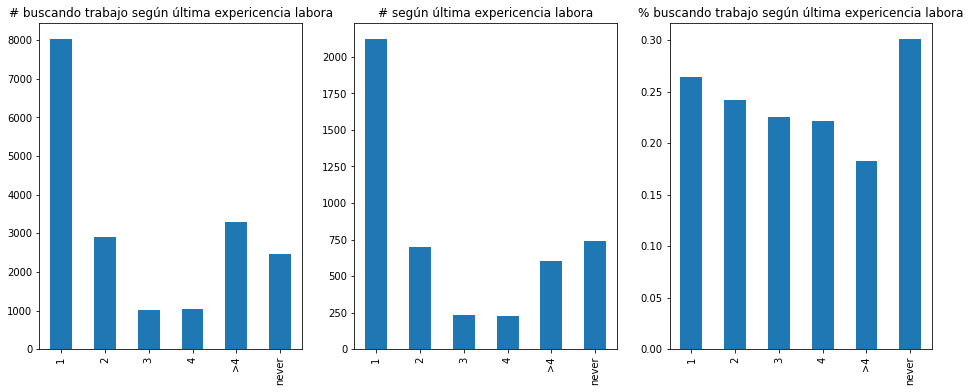

In [280]:
f,ax=plt.subplots(1,3,figsize=(16,6))

ax[0].set_title('# buscando trabajo según última expericencia labora')
train[train.target == True].last_new_job.value_counts()[train.last_new_job.value_counts() > 500].sort_index().plot.bar(ax=ax[1])

ax[1].set_title('# según última expericencia labora')
train.last_new_job.value_counts()[train.last_new_job.value_counts() > 500].sort_index().plot.bar(ax=ax[0])

ax[2].set_title('% buscando trabajo según última expericencia labora')
(train[train.target == True].last_new_job.value_counts()[train.last_new_job.value_counts() > 500].sort_index() / train.last_new_job.value_counts()[train.last_new_job.value_counts() > 500].sort_index()).plot.bar(ax=ax[2])


En esta relacion podemos observar como se sigue mostrando lo comentado anteriormente, personas con poca o nula experiencia suelen estar mas dispuestos a los cambios de trabajo que aquellas personas que ya tienen años de experiencia.

## Correlacion entre las variables

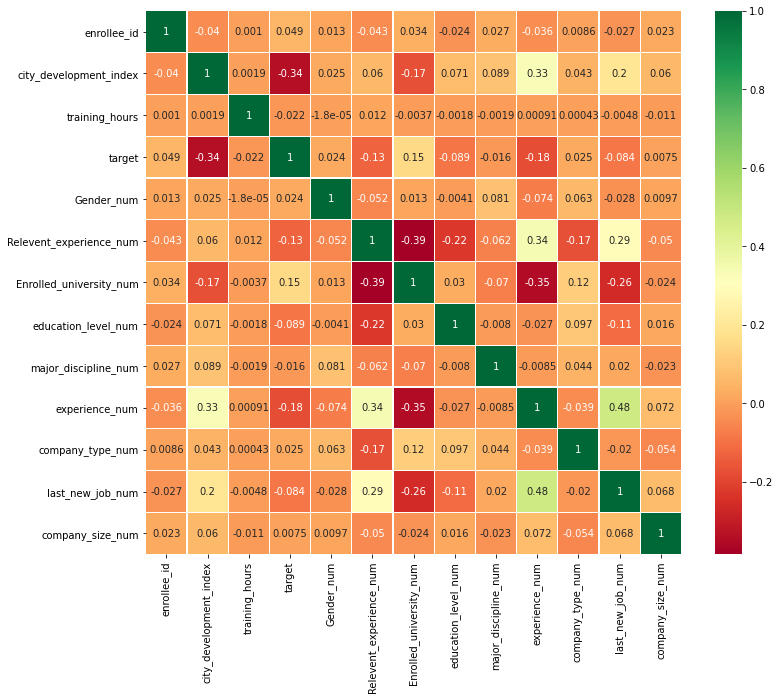

In [209]:
train["Gender_num"] = train.gender.replace(['Male', 'nan', 'Female', 'Other'], [0, 1,2,3])
train["Relevent_experience_num"] = train.relevent_experience.replace(['Has relevent experience', 'No relevent experience'], [1, 0])
train["Enrolled_university_num"] = train.enrolled_university.replace(['no_enrollment', 'Full time course', 'nan', 'Part time course'], [0, 2,-1,1])
train["education_level_num"] = train.education_level.replace(['Graduate', 'Masters', 'High School', 'nan', 'Phd', 'Primary School'], [0, 1,2,3,4,5])
train["major_discipline_num"] = train.major_discipline.replace(['STEM', 'Business Degree', 'nan', 'Arts', 'Humanities', 'No Major','Other'], [0, 1,2,3,4,5,6])
train["experience_num"] = train.experience.replace(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4','10', '14', '18', '19', '12', '3', '6', '9', '8', '20', 'nan'], [21,  15, 5, 0, 11, 13, 7, 17, 2, 16, 1, 4, 10, 14, 18, 19, 12, 3, 6,9, 8, 20, 10])
train["company_type_num"] = train.company_type.replace(['nan', 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other','Public Sector', 'NGO'], [0, 1,2,3,4,5,6])
train["company_size_num"] = train.company_size.replace(['nan', '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49', '100-500', '500-999'], [5000, 100, 10, 20000, 10000,5000,50,500,1000])
train["last_new_job_num"] = train.last_new_job.replace(['1', '>4', 'never', '4', '3', '2', 'nan'], [1,5,-1,4,3,2,2])
train["training_hours"] = train.training_hours.replace('nan', 47)

sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

Podemos observar que existe una alta correlación de la variable de entrada city_development_index y la variable de entrada experience_num con la variable de salida target. 
- En el primer caso podemos suponer que, si la ciudad posee un mayor indice de crecimiento exista un menor interés en la persona de cambiar de empleo debido a que esa persona posiblemente se encuentre trabajando de manera estable en una importante compañia. 
- En el caso de años de experiencia, como se evaluó anteriormente, los gráficos indican que a mayor numero de años la persona se encuentra con menos interes de cambiar de empleo, posiblemente ya se encuentre cómodo en la empresa actual y buscando un desarrollo a nivel organizacional y no individual como sucede con personas con menor años de experiencia.